# Setup   

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

from lib.bloom_filter import BloomFilter
from lib.linear_hash import LinearHash, UniversalHash

# Exercise 1: Bloom filter
Let:
- $m=17$,
- $h_1(x)=(x+15)\text{ mod }m$
- $h_2(x)=(4x+11)\text{ mod }m$
- $h_3(x)=(7x+2)\text{ mod }m$

Insert the keys $23,7,50$ and $91$ into the bit vector, and show the resulting vectors content. Then, find a key that is a false positive.

In [2]:
m = 17
n = 100

h = [
    LinearHash(1, 15, m),
    LinearHash(4, 11, m),
    LinearHash(7, 2, m)
]

bf = BloomFilter(m, h)

nums = [23, 7, 50, 91]

bf.add_all(nums)

bf.print_bit_array()

false_positives = []
for i in range(n):
    output, real = bf.query(i)
    if output and not real:
        false_positives.append(i)

print(f"False positives: {false_positives}")

Bit array: [1 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 ]
False positives: [6, 16, 24, 33, 40, 41, 57, 58, 67, 74, 75, 84, 92]


# Exercise 2: Expected number of zeroes

Let $p$ be the probability that a specific bit $b$ is zero after inserting $n$ elements in the Bloom filter (we calculated the value of $p$ in class). Let $Z$ be the number of bits in the Bloom filter that are zero after inserting $n$ elements.
Show that the expected value of $Z$ is $mp$.

### Solution

$p=$

So if we define $Z=\sum_i x_i=0$, and we insert $n$ elements:

$\mathbb E[Z]=$

In [3]:
expected_specific_bit_zero: float = (1 - 1 / bf.m) ** (len(bf.nums) * len(bf.h))
expected_num_zero: float = bf.m * expected_specific_bit_zero

actual_num_zero: int = bf.m - sum(bf.bit_array)
print(f"Expected # of 0s: {expected_num_zero:.2f}\nActual # of 0s: {actual_num_zero}")

Expected # of 0s: 8.21
Actual # of 0s: 9


# Exercise 3: Union and intersection
Suppose you have two Bloom filters $F_A$ and $F_B$ representing two sets $A$ and $B$. The two Bloom filters are created using the same number of bits $m$ and the same $k$ hash functions.

In [4]:
bfA = BloomFilter(m, h)
bfB = BloomFilter(m, h)

numsA = [1, 2, 5, 7, 8]
numsB = [2, 3, 6, 8, 9]

## Part 3.1
Let $F_\text{OR}$ be a new Bloom filter formed by computing the bitwise $\text{OR}$ of $F_A$ and $F_B$. Is this the same as the Bloom filter constructed by adding the elements of $A\cup B$ one at a time?

In [5]:
bfA.add_all(numsA)
bfB.add_all(numsB)

# Compute the bitwise OR of the two Bloom filters
bfOR = bfA | bfB

# Compute the Bloom filter for the union of the two sets
numsUnion = list(set(numsA) | set(numsB))
bfUnion = BloomFilter(m, h)
bfUnion.add_all(numsUnion)

# Compare the two Bloom filters
print(f"Union of A and B:")
bfUnion.print_bit_array()
print(f"Bitwise OR of A and B:")
bfOR.print_bit_array()

Union of A and B:
Bit array: [1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 ]
Bitwise OR of A and B:
Bit array: [1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 ]


## Part 3.2
Let $F_\text{AND}$ be the bloom filter formed by computing the bitwise $\text{AND}$ of $F_A$ and $F_B$. Argue that this is not the same as the Bloom filter constructed by adding the elements of $A\cap B$ one at a time

In [6]:
# Compute the bitwise AND of the two Bloom filters
bfAND = bfA & bfB

# Compute the Bloom filter for the intersection of the two sets
numsIntersection = list(set(numsA) & set(numsB))
bfIntersection = BloomFilter(m, h)
bfIntersection.add_all(numsIntersection)

# Compare the two Bloom filters
print(f"Intersection of A and B:")
bfIntersection.print_bit_array()
print(f"Bitwise AND of A and B:")
bfAND.print_bit_array()

Intersection of A and B:
Bit array: [1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 ]
Bitwise AND of A and B:
Bit array: [1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 ]


## Part 3.3

Argue that $F_\text{AND}$ can be used to check if an element $x$ is in the set $A\cap B$ with one sided error. That is, give an algorithm that always returns $\texttt{True}$ if $x\in A\cap B$, and explain how we can get false-positives.

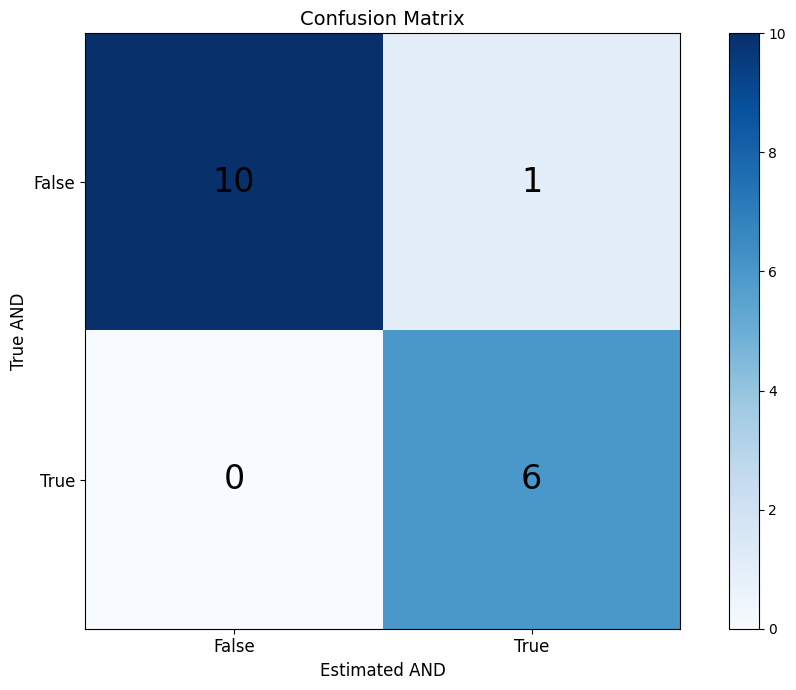

In [ ]:
from lib.utils import confusion_matrix_AND

confusion_matrix_AND(numsA, numsB, m, h)

# Exercise 4: Dynamic size

Bloom filters can easily be halved in size, allowing an application to dynamically shrink a Bloom filter. Suppose that the size of the filter is a power of $2$. To halve the size of the filter, just OR the first and second halves together. Explain how to do a lookup in the new table.

In [8]:
# functions double and halve in bloom_filter.py

# Exercise 5: Set differences

Bloom filters can be used to estimate set differences. Suppose you have two sets $X$ and $Y$ representing two peoples $100$ favorite songs. Let $F_X$ and $F_Y$ be the Bloom filters of the two sets created using the same number of bits $m$ and the same $k$ hash functions.

## Part 5.1
What is the probability that a given bit $b$ is $1$ in $F_X$ and $0$ in $F_Y$? The answer should be given as a function of $m$, $k$, and $|X\cap Y|$.

*Hint: The following notation can be useful: for a set $S$ of songs, let $\text{bit}(S)$ denote the set of bits that are one after (only) the elements in $S$ are inserted in the Bloom filter, i.e., $$\text{bit}(S)=\{b:\exists x\in S,j\in\{1,\ldots,k\}\text{ such that }h_j(x)=b\}$$*

In [9]:
n = 200
s = 100
m = 1000

S1 = np.sort(random.sample(range(n), s))
S2 = np.sort(random.sample(range(n), s))

I = np.intersect1d(S1, S2)
print(len(I))

h1 = LinearHash(1, 15, m)
h2 = LinearHash(4, 11, m)
h3 = LinearHash(7, 2, m)

bf1 = BloomFilter(m, [h1, h2, h3])
bf2 = BloomFilter(m, [h1, h2, h3])

bf1.add_all(S1)
bf2.add_all(S2)

bf3 = bf1 - bf2
bf4 = bf2 - bf1

p = (1 - 1 / m) ** (3 * s)
p_star = (1 - 1 / m) ** (3 * (s - len(I)))
expected = m * (1 - p_star) * p

actual_bf3 = sum(bf3.bit_array)
actual_bf4 = sum(bf4.bit_array)

print(f"Expected: {expected}\nActual bf3: {actual_bf3}\nActual bf4: {actual_bf4}")


47
Expected: 108.93689189840667
Actual bf3: 115
Actual bf4: 114


## Part 5.2
Determine the expected number of bits where the two Bloom filters differs as a function of $m$,$k$, and $|X\cap Y|$.

## Part 5.3

Explain how this could be used as a tool to find people with the same taste in music more easily than comparing the lists of songs directly.

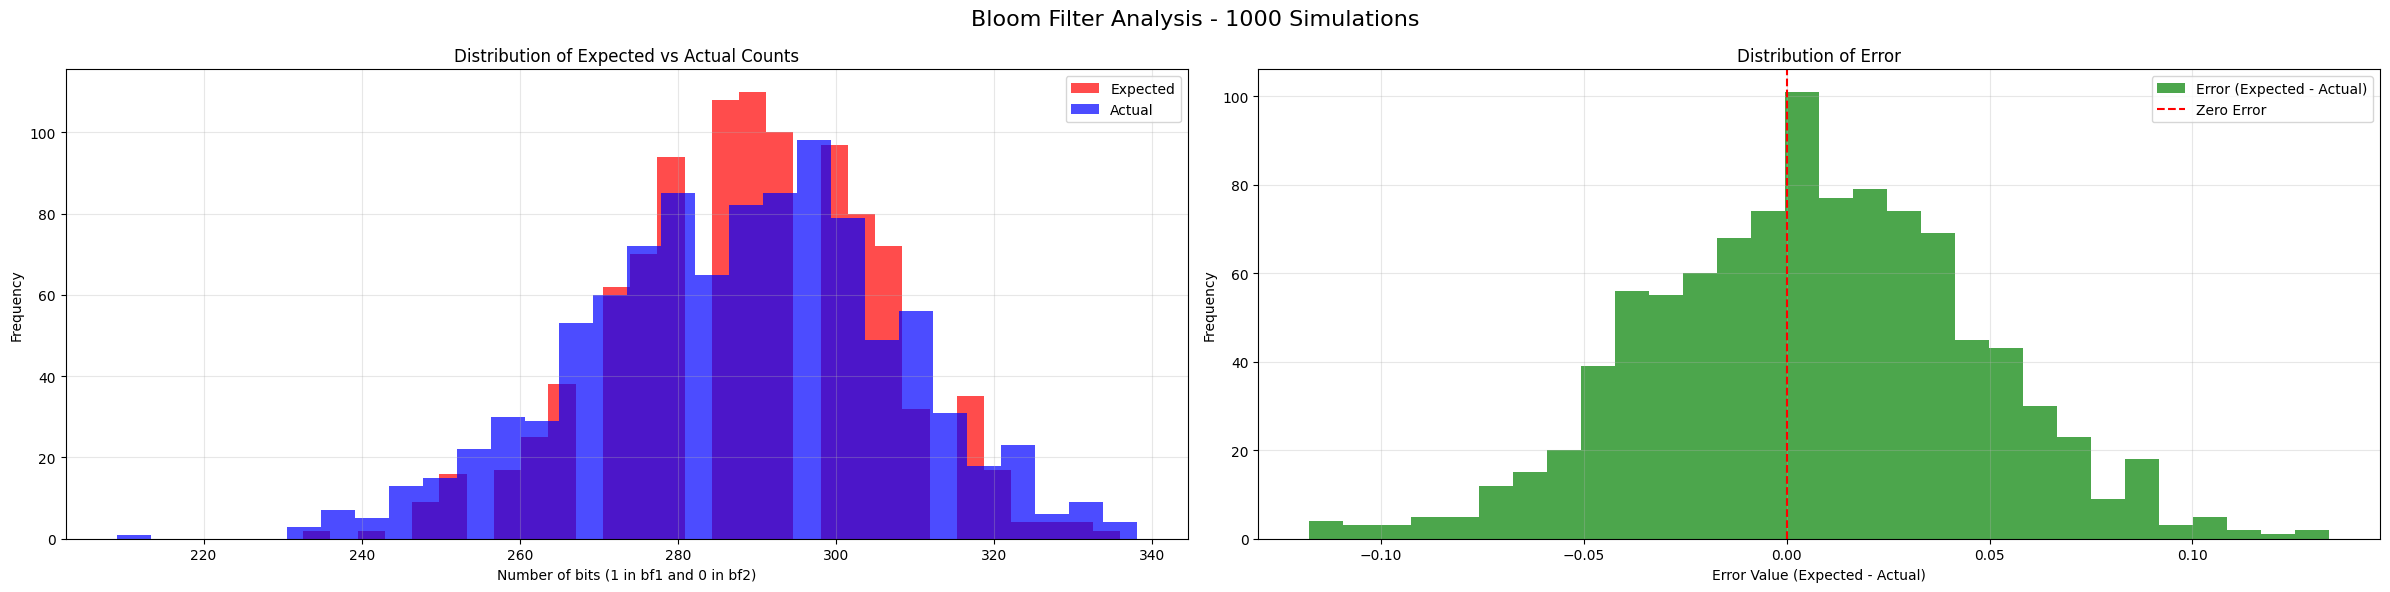

Expected count (mean): 289.07
Actual count (mean): 287.17
Expected count (std): 16.45
Actual count (std): 19.66


In [ ]:
# Parameters
n = 200  # Universe size
s = 100  # Set size
m = 2000  # Bloom filter size
k = 20
num_simulations = 1000

expected_counts = []
actual_counts = []
error_rates = []

for _ in range(num_simulations):
    S1 = np.sort(random.sample(range(n), s))
    S2 = np.sort(random.sample(range(n), s))
    
    I = np.intersect1d(S1, S2)
    
    hs = [UniversalHash(f"salt_{i}", m) for i in range(k)]
    
    bf1 = BloomFilter(m, hs)
    bf2 = BloomFilter(m, hs)
    
    bf1.add_all(S1)
    bf2.add_all(S2)
    
    bf3 = bf1 - bf2
    
    p_star = (1 - 1 / m) ** (len(hs) * (s - len(I)))
    p = (1 - 1 / m) ** (len(hs) * s)
    expected = m * (1 - p_star) * p
    
    actual = sum(bf3.bit_array)
    
    expected_counts.append(expected)
    actual_counts.append(actual)
    error_rates.append((expected - actual) / expected)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 6))

# Left plot: Expected vs Actual counts
ax1.hist(expected_counts, bins=30, alpha=0.7, color='red', label='Expected')
ax1.hist(actual_counts, bins=30, alpha=0.7, color='blue', label='Actual')
ax1.set_xlabel('Number of bits (1 in bf1 and 0 in bf2)')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Expected vs Actual Counts')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Right plot: Error counts
ax2.hist(error_rates, bins=30, alpha=0.7, color='green', label='Error (Expected - Actual)')
ax2.set_xlabel('Error Value (Expected - Actual)')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of Error')
ax2.axvline(x=0, color='red', linestyle='--', label='Zero Error')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.suptitle('Bloom Filter Analysis - 1000 Simulations', fontsize=16)
plt.tight_layout()
plt.show()

print(f"Expected count (mean): {np.mean(expected_counts):.2f}")
print(f"Actual count (mean): {np.mean(actual_counts):.2f}")
print(f"Expected count (std): {np.std(expected_counts):.2f}")
print(f"Actual count (std): {np.std(actual_counts):.2f}")


# Exercise 6: Deletion
Suppose that we want to extend Bloom filters to allow deletions as well as insertions of items into the underlying set. We could modify the Bloom filter to be an array of counters instead of an array of bits. Each time an item is inserted into a Bloom filter, the counter given by the hashes of the item are increased by one. To delete an item, one can simply decrement the counters. To keep space small, the counters should be a fixed length, such as $4$ bits.
Explain how errors can arise when using fixed-length counters.

## Solution

In [11]:
# see bloom_filter_counter.py